<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scan-variables" data-toc-modified-id="Scan-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scan variables</a></span></li><li><span><a href="#Visualise-earthquakes-by-year" data-toc-modified-id="Visualise-earthquakes-by-year-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualise earthquakes by year</a></span></li><li><span><a href="#Visualise-earthquakes-by-location" data-toc-modified-id="Visualise-earthquakes-by-location-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualise earthquakes by location</a></span></li></ul></div>

In [9]:
# Import Necessary Libraries

from google.cloud import bigquery
from google.cloud.bigquery import Dataset
from google.cloud import storage

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# function to print a table schema:
def printTableSchema(aTable):
    schemas = list(aTable.schema)
    if schemas:
        print('Table schema for {}:'.format(aTable.table_id))
        for aSchema in schemas:
            print('\t{0} {1}'.format(aSchema.name, aSchema.field_type))
        found = True
    else:
        found = False
    return found

# Set up BigQuery 

In [11]:
# Project created as a owner
private_project = 'magnetic-math-233501'

# Public project of big query
public_project = 'bigquery-public-data'

# Set storage client
storage_client = storage.Client()

# Set big query client
client = bigquery.Client(project=public_project)

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

In [ ]:
dataset_id = 'noaa_significant_earthquakes'

# Get the public dataset
dataset_ref = client.dataset(dataset_id, project=public_project)

In [12]:
# Set the project as private to run queries
client = bigquery.Client(project=private_project)

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

In [14]:
table_ref = dataset_ref.table('earthquakes')
table = client.get_table(table_ref)
printTableSchema(table)

NameError: name 'dataset_ref' is not defined

In [13]:
query = """
        SELECT MAX(year), MIN(year)
        FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
        WHERE year > 0
        
        """

earthquakes_stats = client.query(query).to_dataframe()

earthquakes_stats

NameError: name 'client' is not defined

In [12]:
query = """
        SELECT *
        FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
        WHERE year = 10
        LIMIT 2
        
        """

client.query(query).to_dataframe()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,38,None,10,None,None,None,None,None,18,7.1,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded["MFG10YearTerminationData_tab.csv"]))

In [13]:
query = """
        SELECT year, COUNT(*) AS num_earthquakes
        FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
        WHERE year >= 1900
        GROUP BY year
        ORDER BY year
        """

earthquakes_by_year = client.query(query).to_dataframe()
earthquakes_by_year

,year,num_earthquakes
0,1900,18
1,1901,18
2,1902,22
3,1903,22
4,1904,18
5,1905,31
6,1906,31
7,1907,23
8,1908,13
9,1909,33


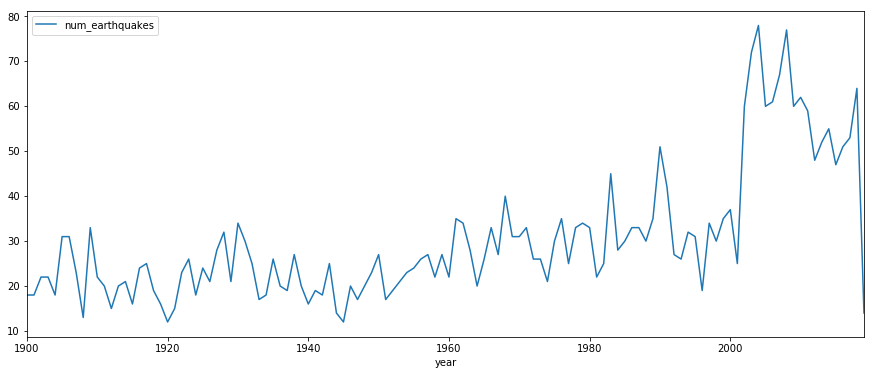

In [16]:
earthquakes_by_year.set_index('year').plot(kind='line', figsize=(15, 6))
plt.show()

There seems to be a large increase in the number of earthquakes from the year 2000. This may be due to better data collection from this date. 

In [17]:
query = """
        SELECT COUNT(*)
        FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
        WHERE year >= 2000
        """

client.query(query).to_dataframe()

,f0_
0,1102


In [18]:
query = """
        SELECT COUNT(*)
        FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
        WHERE year < 2000 AND year >= 1980
        """

client.query(query).to_dataframe()

,f0_
0,641


The period from 2000-2019 has 11102 earthquakes recorded, which is almost twice the number of earthquakes from 1980-2000.

In [21]:
query = """
        SELECT *
        FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
        WHERE year >= 2000
        """

earthquakes_since_2000 = client.query(query).to_dataframe()

In [4]:
earthquakes_since_2000.to_csv("earthquakes_since_2000.csv", index=False)

NameError: name 'earthquakes_since_2000' is not defined

In [16]:
df = pd.read_csv("earthquakes_since_2000.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 47 columns):
id                                    1102 non-null int64
flag_tsunami                          197 non-null object
year                                  1102 non-null int64
month                                 1102 non-null int64
day                                   1102 non-null int64
hour                                  1100 non-null float64
minute                                1100 non-null float64
second                                1080 non-null float64
focal_depth                           1093 non-null float64
eq_primary                            1101 non-null float64
eq_mag_mw                             857 non-null float64
eq_mag_ms                             528 non-null float64
eq_mag_mb                             815 non-null float64
eq_mag_ml                             108 non-null float64
eq_mag_mfa                            0 non-null float64
eq_mag_unk

# EDA

## Scan variables

In [24]:
earthquakes_since_2000.head()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,5735,Tsu,2003,11,17,6.0,43.0,6.8,33.0,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6738,Tsu,2005,6,15,2.0,50.0,53.1,10.0,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7532,Tsu,2007,8,2,3.0,21.0,42.8,21.0,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7601,None,2007,8,6,8.0,48.0,40.0,2.0,4.2,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7614,None,2007,8,17,0.0,38.0,56.0,0.0,1.6,...,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
earthquakes_since_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 47 columns):
id                                    1102 non-null int64
flag_tsunami                          197 non-null object
year                                  1102 non-null int64
month                                 1102 non-null int64
day                                   1102 non-null int64
hour                                  1100 non-null float64
minute                                1100 non-null float64
second                                1080 non-null float64
focal_depth                           1093 non-null float64
eq_primary                            1101 non-null float64
eq_mag_mw                             857 non-null float64
eq_mag_ms                             528 non-null float64
eq_mag_mb                             815 non-null float64
eq_mag_ml                             108 non-null float64
eq_mag_mfa                            0 non-null object
eq_mag_unk 

In [28]:
earthquakes_since_2000.shape

(1102, 47)

In [26]:
# Count NaN values

earthquakes_since_2000.isnull().sum()

id                                       0
flag_tsunami                           905
year                                     0
month                                    0
day                                      0
hour                                     2
minute                                   2
second                                  22
focal_depth                              9
eq_primary                               1
eq_mag_mw                              245
eq_mag_ms                              574
eq_mag_mb                              287
eq_mag_ml                              994
eq_mag_mfa                            1102
eq_mag_unk                            1098
intensity                              881
country                                  0
state                                 1048
location_name                            0
latitude                                 0
longitude                                0
region_code                              0
deaths     

In [42]:
# Does each row have at least one measurement?

measures = ['focal_depth', 'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 
            'eq_mag_mb', 'eq_mag_ml', 'eq_mag_mfa', 'eq_mag_unk', 'intensity']

eq_measurements = earthquakes_since_2000[measures]

# There are 9 measurements. Are there any rows in eq_measurements that have 9 NaNs?

(eq_measurements.isnull().sum(axis=1) == len(measures)).sum()

0

## Visualise earthquakes by year

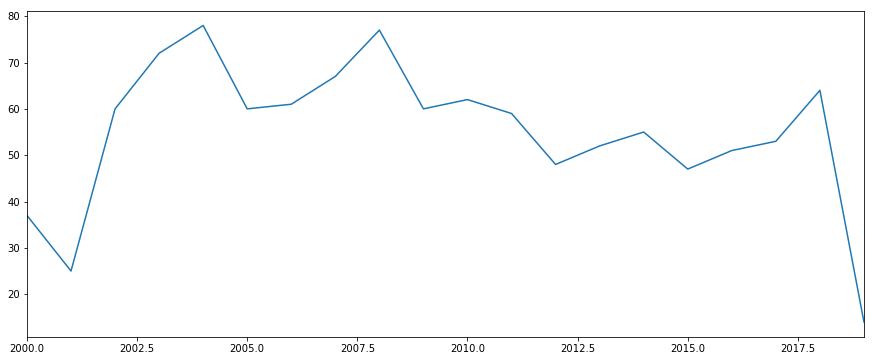

In [50]:
eq_freq_year = earthquakes_since_2000['year'].value_counts().sort_index()

eq_freq_year.plot(kind='line', figsize=(15, 6))
plt.show()

In [69]:
region_codes = {10: 'Central, Western and S. Africa',
                15: 'Northern Africa',
                20: 'Antarctica',
                30: 'East Asia',
                40: 'Central Asia and Caucasus',
                50: 'Kamchatka and Kuril Islands',
                60: 'S. and SE. Asia and Indian Ocean',
                70: 'Atlantic Ocean',
                80: 'Bering Sea',
                90: 'Caribbean',
                100: 'Central America',
                110: 'Eastern Europe',
                120: 'Northern and Western Europe',
                130: 'Southern Europe',
                140: 'Middle East',
                150: 'North America and Hawaii',
                160: 'South America',
                170: 'Central and South Pacific'}

continent = {'Central, Western and S. Africa': 'Africa',
             'Northern Africa': 'Africa',
             'Antarctica': 'Antarctica', 
             'East Asia': 'Asia',
             'Central Asia and Caucasus': 'Asia',
             'Kamchatka and Kuril Islands': 'Asia',
             'S. and SE. Asia and Indian Ocean': 'Asia',
             'Atlantic Ocean': 'Atlantic Ocean',
             'Bering Sea': 'Pacific Ocean',
             'Caribbean': 'Central America',
             'Central America': 'Central America',
             'Eastern Europe': 'Europe',
             'Northern and Western Europe': 'Europe',
             'Southern Europe': 'Europe',
             'Middle East': 'Asia',
             'North America and Hawaii': 'North America',
             'South America': 'South America',
             'Central and South Pacific': 'Pacific Ocean'}

In [58]:
eq_year_region = earthquakes_since_2000.groupby(['year', 'region_code'])['id'].count().reset_index()

In [59]:
eq_year_region['region'] = eq_year_region['region_code'].map(region_codes) 

In [29]:
eq_year_deaths = df.groupby(['country','year'])['deaths'].sum().reset_index()
eq_year_deaths.head()

,country,year,deaths
0,AFGHANISTAN,2000,0.0
1,AFGHANISTAN,2001,4.0
2,AFGHANISTAN,2002,1166.0
3,AFGHANISTAN,2004,5.0
4,AFGHANISTAN,2005,5.0


In [61]:
eq_year_region.head()

,year,region_code,id,region
0,2000,10,2,"Central, Western and S. Africa"
1,2000,30,11,East Asia
2,2000,40,3,Central Asia and Caucasus
3,2000,50,1,Kamchatka and Kuril Islands
4,2000,60,5,S. and SE. Asia and Indian Ocean


In [64]:
eq_year_region_piv = pd.pivot_table(eq_year_region,
                                    index='year', columns='region', values='id',
                                    aggfunc='sum').fillna(0)

eq_year_region_piv

region,Antarctica,Atlantic Ocean,Caribbean,Central America,Central Asia and Caucasus,Central and South Pacific,"Central, Western and S. Africa",East Asia,Eastern Europe,Kamchatka and Kuril Islands,Middle East,North America and Hawaii,Northern Africa,Northern and Western Europe,S. and SE. Asia and Indian Ocean,South America,Southern Europe
year,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,2.0,3.0,5.0,2.0,11.0,0.0,1.0,4.0,1.0,0.0,2.0,5.0,0.0,1.0
2001,0.0,0.0,0.0,3.0,2.0,3.0,0.0,6.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,4.0,1.0
2002,0.0,0.0,0.0,1.0,9.0,12.0,3.0,4.0,0.0,0.0,7.0,6.0,1.0,3.0,5.0,4.0,5.0
2003,1.0,0.0,2.0,2.0,9.0,9.0,0.0,15.0,1.0,0.0,10.0,6.0,2.0,2.0,8.0,1.0,4.0
2004,0.0,0.0,2.0,3.0,3.0,8.0,1.0,15.0,2.0,1.0,15.0,3.0,4.0,2.0,11.0,4.0,4.0
2005,0.0,0.0,1.0,0.0,2.0,4.0,3.0,12.0,0.0,0.0,12.0,2.0,0.0,0.0,15.0,7.0,2.0
2006,0.0,0.0,3.0,1.0,5.0,6.0,2.0,9.0,3.0,2.0,6.0,1.0,1.0,3.0,14.0,2.0,3.0
2007,0.0,0.0,1.0,1.0,3.0,13.0,0.0,7.0,0.0,2.0,8.0,7.0,0.0,1.0,13.0,9.0,2.0
2008,0.0,1.0,0.0,4.0,9.0,6.0,2.0,16.0,1.0,1.0,7.0,5.0,2.0,2.0,12.0,8.0,1.0


In [30]:
eq_year_death_piv = pd.pivot_table(eq_year_deaths,
                                    index='year', columns='country', values='deaths',
                                    aggfunc='sum').fillna(0)

eq_year_death_piv

country,AFGHANISTAN,ALBANIA,ALGERIA,ANTARCTICA,ARGENTINA,ATLANTIC OCEAN,AUSTRALIA,AZERBAIJAN,BANGLADESH,BHUTAN,...,TRINIDAD AND TOBAGO,TURKEY,TURKMENISTAN,UK,USA,USA TERRITORY,UZBEKISTAN,VANUATU,VENEZUELA,VIETNAM
year,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,...,0.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2002,1166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,2275.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,178.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2004,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


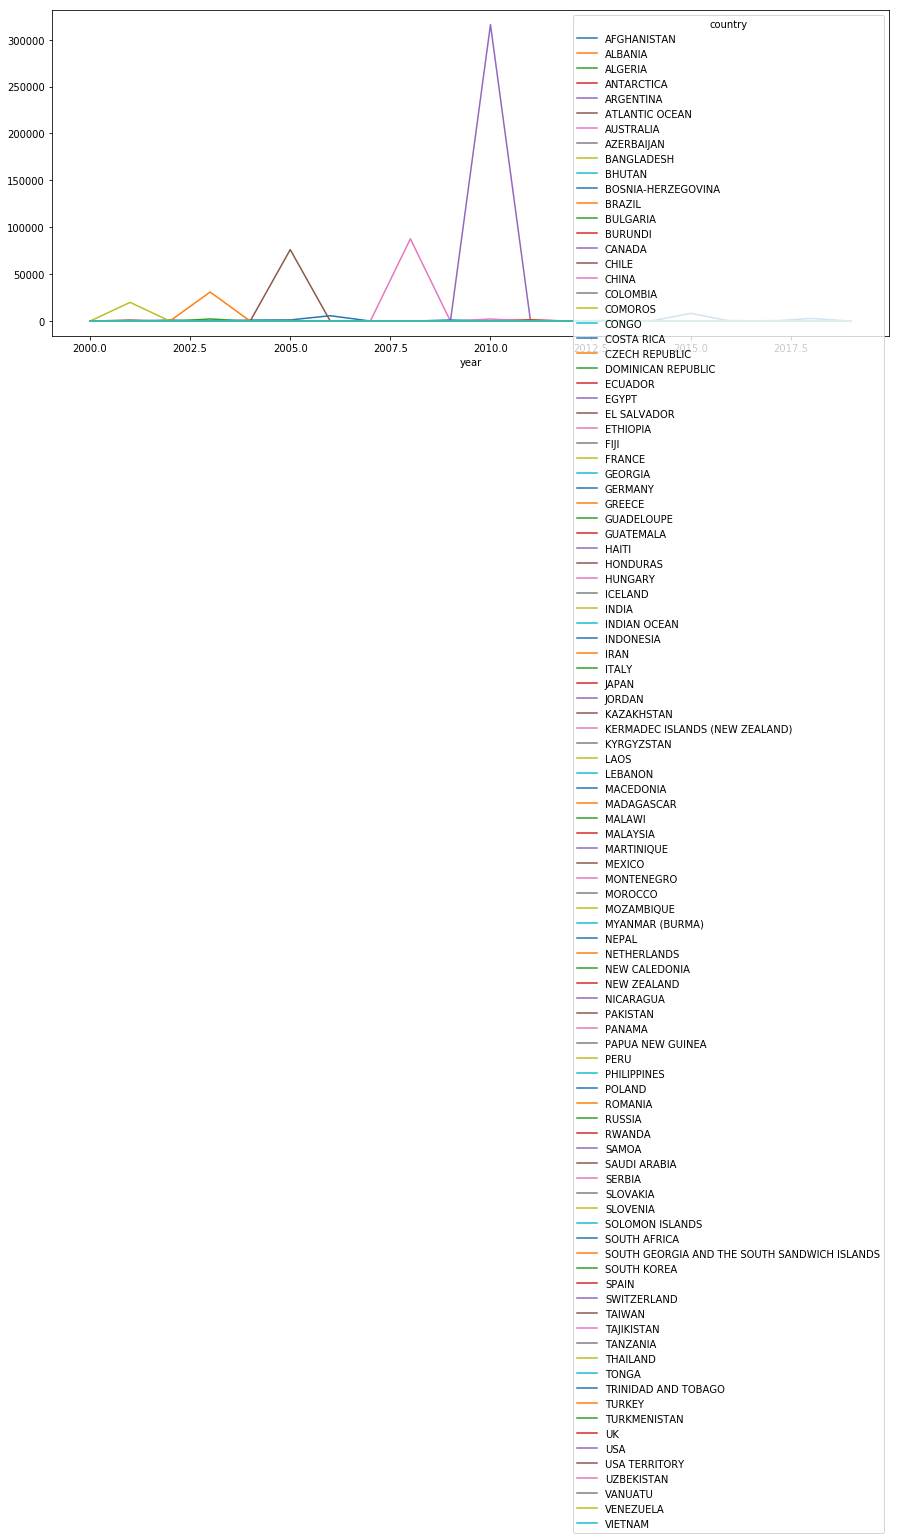

In [31]:
eq_year_death_piv.plot(kind='line', figsize=(15, 6))

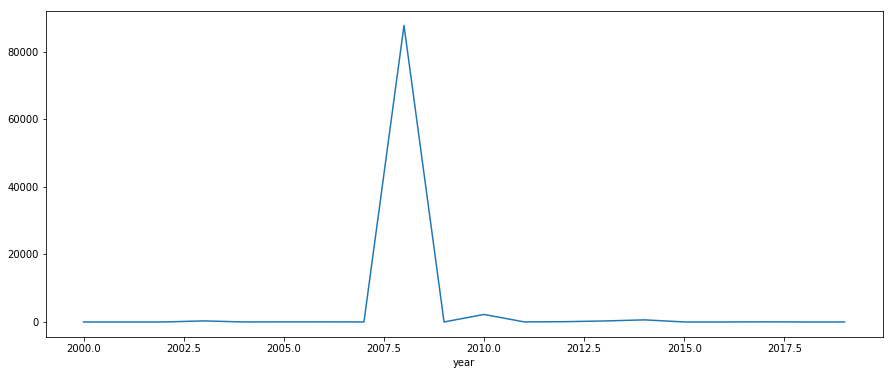

In [32]:
eq_year_death_piv['CHINA'].plot(kind='line', figsize=(15, 6))

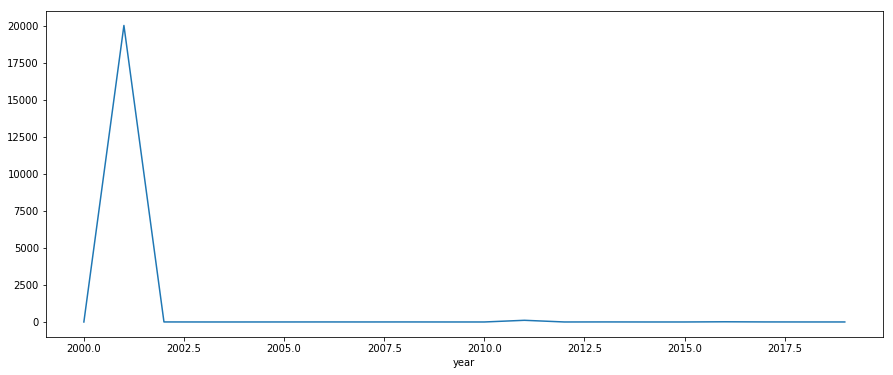

In [37]:
eq_year_death_piv['INDIA'].plot(kind='line', figsize=(15, 6))

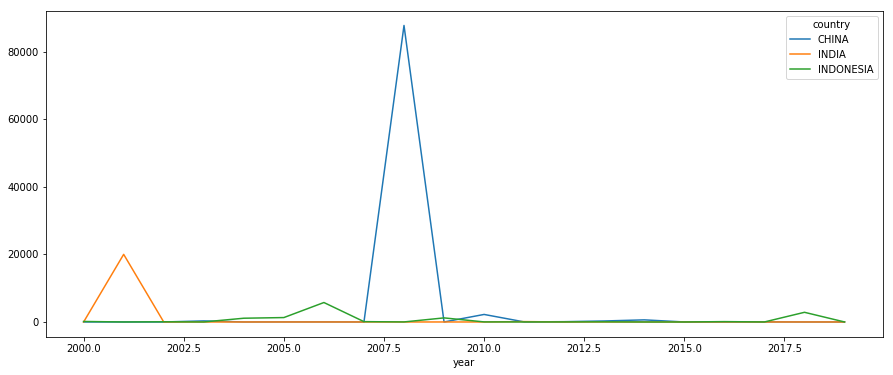

In [38]:
eq_year_death_piv[['CHINA','INDIA','INDONESIA']].plot(kind='line', figsize=(15, 6))

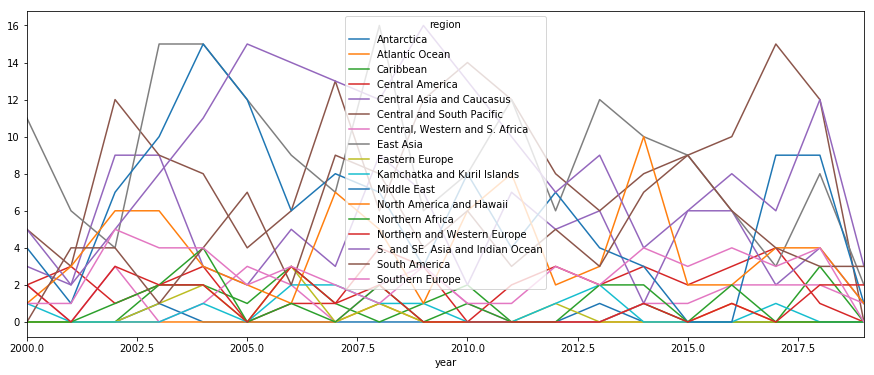

In [68]:
eq_year_region_piv.plot(kind='line', figsize=(15, 6))

In [ ]:
eq_year_region = earthquakes_since_2000.groupby(['year', 'region_code'])['id'].count().reset_index()

In [70]:
eq_year_region['continent'] = eq_year_region['region'].map(continent)

eq_year_region.head()

,year,region_code,id,region,continent
0,2000,10,2,"Central, Western and S. Africa",Africa
1,2000,30,11,East Asia,Asia
2,2000,40,3,Central Asia and Caucasus,Asia
3,2000,50,1,Kamchatka and Kuril Islands,Asia
4,2000,60,5,S. and SE. Asia and Indian Ocean,Asia


In [72]:
eq_year_continent = eq_year_region.groupby(['year', 'continent'])['id'].sum().reset_index()

eq_year_continent

,year,continent,id
0,2000,Africa,2
1,2000,Asia,24
2,2000,Central America,2
3,2000,Europe,3
4,2000,North America,1
5,2000,Pacific Ocean,5
6,2001,Asia,11
7,2001,Central America,3
8,2001,Europe,1
9,2001,North America,3


In [73]:
eq_year_continent_piv = pd.pivot_table(eq_year_continent,
                                       index='year', columns='continent', values='id',
                                       aggfunc='sum').fillna(0)

eq_year_continent_piv

continent,Africa,Antarctica,Asia,Atlantic Ocean,Central America,Europe,North America,Pacific Ocean,South America
year,,,,,,,,,
2000,2.0,0.0,24.0,0.0,2.0,3.0,1.0,5.0,0.0
2001,0.0,0.0,11.0,0.0,3.0,1.0,3.0,3.0,4.0
2002,4.0,0.0,25.0,0.0,1.0,8.0,6.0,12.0,4.0
2003,2.0,1.0,42.0,0.0,4.0,7.0,6.0,9.0,1.0
2004,5.0,0.0,45.0,0.0,5.0,8.0,3.0,8.0,4.0
2005,3.0,0.0,41.0,0.0,1.0,2.0,2.0,4.0,7.0
2006,3.0,0.0,36.0,0.0,4.0,9.0,1.0,6.0,2.0
2007,0.0,0.0,33.0,0.0,2.0,3.0,7.0,13.0,9.0
2008,4.0,0.0,45.0,1.0,4.0,4.0,5.0,6.0,8.0


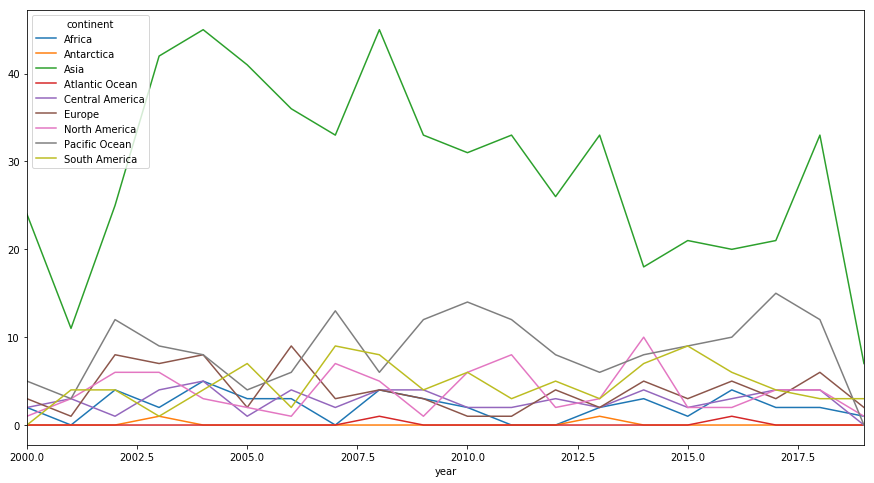

In [74]:
eq_year_continent_piv.plot(kind='line', figsize=(15, 8))
plt.show()

## Visualise earthquakes by location

In [75]:
earthquakes_since_2000['country'].value_counts()

CHINA                                           128
INDONESIA                                       113
IRAN                                             74
JAPAN                                            65
USA                                              50
INDIA                                            48
TURKEY                                           39
PHILIPPINES                                      29
PERU                                             28
CHILE                                            27
NEW ZEALAND                                      25
MEXICO                                           24
PAKISTAN                                         22
AFGHANISTAN                                      21
RUSSIA                                           20
GREECE                                           19
ITALY                                            18
VANUATU                                          18
PAPUA NEW GUINEA                                 17
TAIWAN      